In [32]:
import numpy
import pandas
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import os
from math import log, sqrt
import pandas

In [7]:
currentdirectory='C:/Users/Mehsam/Documents/MyWorkInPython/'

In [20]:
dtype_dict=dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
houseprice_complete=pandas.read_csv(currentdirectory+'AnacondaProjects/Coursera_MachineLearning/kc_house_data.csv',dtype=dtype_dict)
houseprice_train=pandas.read_csv(currentdirectory+'AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_train_data.csv',dtype=dtype_dict)
houseprice_validation=pandas.read_csv(currentdirectory+'AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_valid_data.csv',dtype=dtype_dict)
houseprice_validation_shuffled=pandas.read_csv(currentdirectory+'AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_train_valid_shuffled.csv',dtype=dtype_dict)
houseprice_test=pandas.read_csv(currentdirectory+'AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_test_data.csv',dtype=dtype_dict)
houseprice_set1=pandas.read_csv(currentdirectory+'AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_set_1_data.csv',dtype=dtype_dict )
houseprice_set2=pandas.read_csv(currentdirectory+'AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_set_2_data.csv',dtype=dtype_dict )
houseprice_set3=pandas.read_csv(currentdirectory+'AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_set_3_data.csv',dtype=dtype_dict )
houseprice_set4=pandas.read_csv(currentdirectory+'AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_set_4_data.csv',dtype=dtype_dict )

In [60]:
dataset=houseprice_test
dataset['sqft_living_sqrt'] = dataset['sqft_living'].apply(sqrt)
dataset['sqft_lot_sqrt'] = dataset['sqft_lot'].apply(sqrt)
dataset['bedrooms_square'] = dataset['bedrooms']*dataset['bedrooms']
dataset['floors_square'] = dataset['floors']*dataset['floors']

In [26]:
all_features = ['bedrooms', 'bedrooms_square',
            'bathrooms',
            'sqft_living', 'sqft_living_sqrt',
            'sqft_lot', 'sqft_lot_sqrt',
            'floors', 'floors_square',
            'waterfront', 'view', 'condition', 'grade',
            'sqft_above',
            'sqft_basement',
            'yr_built', 'yr_renovated']

In [57]:
Dataset_train_features=houseprice_complete[all_features]
Dataset_train_target=houseprice_complete['price']
# poly15_data['price'] = Dataset['price']
model=lm.Lasso(alpha=5e2, normalize=True)
model.fit(Dataset_train_features,Dataset_train_target)
table = list(zip(model.coef_, Dataset_train_features.columns.values))
df = pandas.DataFrame(table)
df.columns=['Weight','Feature']
df=df[['Feature','Weight']]
df[df['Weight']!=0]

,Feature,Weight
3,sqft_living,134.439314
10,view,24750.004586
12,grade,61749.103091


In [138]:
rss_list=[]
for l1_penalty in numpy.logspace(1, 7, num=13):
    model1 = lm.Lasso(alpha=l1_penalty, normalize=True)
    # Trained Dataset on Training Data
    model1.fit(houseprice_train[all_features],houseprice_train['price'])
    # Calculating RSS on Validation Dataset
    rss_list.append([l1_penalty,str(mean_squared_error(houseprice_validation['price'], model1.predict(X=houseprice_validation[all_features])))])
rss_df = pandas.DataFrame(rss_list)
rss_df.columns=['l1_penalty','RSS','NonZeroFeatures']
rss_df['RSS']=pandas.to_numeric(rss_df['RSS'])
# Picking Alpha Value that gives minimum RSS on Validation Set
print (rss_df.ix[rss_df['RSS'].idxmin()])
# Training Model with Alpha with Lowest RSS on Validation Set
model2 = lm.Lasso(alpha=rss_df.ix[rss_df['RSS'].idxmin()][0], normalize=True)
model2.fit(houseprice_train[all_features],houseprice_train['price'])
# Trained Dataset on Training Data
table = list(zip(model2.coef_, houseprice_test[all_features].columns.values))
# print (table)
df = pandas.DataFrame(table)
df.columns=['Weight','Feature']
df=df[['Feature','Weight']]
# df.add(pandas.DataFrame(["",model2.intercept_]))
print df[df['Weight']!=0]
print 'Y-Intecept '+str(model2.intercept_)
print df[df['Weight']!=0].count()+  1 if str(model2.intercept_)!=0 else 0
print (mean_squared_error(houseprice_test['price'], model1.predict(X=houseprice_test[all_features])))

l1_penalty    1.000000e+01
RSS           4.132987e+10
Name: 0, dtype: float64
             Feature         Weight
0           bedrooms  -16144.562757
1    bedrooms_square     373.245384
2          bathrooms   50841.243340
3        sqft_living     617.853560
4   sqft_living_sqrt  -44411.354867
5           sqft_lot       0.785623
6      sqft_lot_sqrt    -701.194765
8      floors_square    5014.200457
9         waterfront  619488.752486
10              view   38041.855652
11         condition   24998.771838
12             grade  128716.234621
15          yr_built   -3293.831180
16      yr_renovated      10.057321
Y-Intecept 6630155.66863
Feature    15
Weight     15
dtype: int64
128425315837.0


In [139]:
max_nonzeros=7

In [193]:
rss_list2=[]
for l1_penalty in numpy.logspace(1, 4, num=20):
    model3 = lm.Lasso(alpha=l1_penalty, normalize=True)
    # Trained Dataset on Training Data
    model3.fit(houseprice_train[all_features],houseprice_train['price'])
    # Calculating RSS on Validation Dataset
    rss_list2.append([l1_penalty,str(mean_squared_error(houseprice_validation['price'], model1.predict(X=houseprice_validation[all_features]))),numpy.count_nonzero(model3.coef_)+numpy.count_nonzero(model3.intercept_)])
    rss_df2 = pandas.DataFrame(rss_list2)
    rss_df2.columns=['l1_penalty','RSS','NonZeroFeatures']
    rss_df2['RSS']=pandas.to_numeric(rss_df2['RSS'])
# rss_df2[rss_df2['NonZeroFeatures']>max_nonzeros]['NonZeroFeatures'].count()
l1_penalty_min=rss_df2[rss_df2['NonZeroFeatures']>max_nonzeros]['l1_penalty'].max()
l1_penalty_max=rss_df2[rss_df2['NonZeroFeatures']<max_nonzeros]['l1_penalty'].min()
print ('l1_penalty_min '+str(rss_df2[rss_df2['NonZeroFeatures']>max_nonzeros]['l1_penalty'].max()))
print ('l1_penalty_max '+str(rss_df2[rss_df2['NonZeroFeatures']<max_nonzeros]['l1_penalty'].min()))

l1_penalty_min 127.42749857
l1_penalty_max 263.665089873


In [203]:
Penaltylist_7features=[]
for l1_penalty in numpy.linspace(l1_penalty_min,l1_penalty_max,20):
    model4 = lm.Lasso(l1_penalty, normalize=True) # set parameters
    model4.fit(houseprice_train[all_features], houseprice_train['price']) # learn weights
    RSS = mean_squared_error(houseprice_validation['price'], model4.predict(X=houseprice_validation[all_features]))
#     print (numpy.count_nonzero(model4.coef_))
    NonZeroCount= numpy.count_nonzero(model4.coef_) + 1 if model4.intercept_!=0 else 0
#     print numpy.count_nonzero(model4.coef_) + 1 if model4.intercept_!=0 else 0
    if NonZeroCount==7:
        Penaltylist_7features.append((l1_penalty,RSS,NonZeroCount))
Penaltylist_7features = pandas.DataFrame(Penaltylist_7features)
Penaltylist_7features.columns=['l1_penalty','RSS','NonZeroFeatures']
Penaltylist_7features

,l1_penalty,RSS,NonZeroFeatures
0,156.109097,4.567072e+10,7
1,163.279496,4.574753e+10,7
2,170.449896,4.582944e+10,7
3,177.620295,4.591660e+10,7
4,184.790695,4.600900e+10,7
5,191.961094,4.610688e+10,7
6,199.131494,4.620973e+10,7


In [204]:
# Getting Coefficients with Best Alpha of 7 Features with minimum RSS
best_alpha_7=Penaltylist_7features.ix[Penaltylist_7features['RSS'].idxmin()]['l1_penalty']
model5 = lm.Lasso(alpha=best_alpha_7, normalize=True) # set parameters
model5.fit(houseprice_train[all_features], houseprice_train['price']) # learn weights
pandas.Series(model5.coef_, index = all_features)

bedrooms                -0.000000
bedrooms_square         -0.000000
bathrooms            10610.890284
sqft_living            163.380252
sqft_living_sqrt         0.000000
sqft_lot                -0.000000
sqft_lot_sqrt           -0.000000
floors                   0.000000
floors_square            0.000000
waterfront          506451.687115
view                 41960.043555
condition                0.000000
grade               116253.553700
sqft_above               0.000000
sqft_basement            0.000000
yr_built             -2612.234880
yr_renovated             0.000000
dtype: float64

In [52]:
def get_rss(input_features_train,input_target_train,output_features_test,output_target_test,method):
    if method==1:
        linear_model=lm.LinearRegression()
        linear_model.fit(X=input_features_train,y=input_target_train)
        return_variable= str(mean_squared_error(output_target_test, linear_model.predict(X=output_features_test)))
    elif method==2:
        regr_cv = RidgeCV(alphas=numpy.arange(-1000, 1000, 0.1))
        scaler = StandardScaler()
        input_features_train_std = scaler.fit_transform(input_features_train)
        model_cv = regr_cv.fit(input_features_train_std, input_target_train)
        return_variable= [str(mean_squared_error(output_target_test, model_cv.predict(X=output_features_test))),model_cv.alpha_]
    elif method==3:
        regr_cv = Lasso(alphas=numpy.arange(-1000, 1000, 0.1))
        scaler = StandardScaler()
        input_features_train_std = scaler.fit_transform(input_features_train)
        model_cv = regr_cv.fit(input_features_train_std, input_target_train)
        return_variable= [str(mean_squared_error(output_target_test, model_cv.predict(X=output_features_test))),model_cv.alpha_]
        
        return return_variable

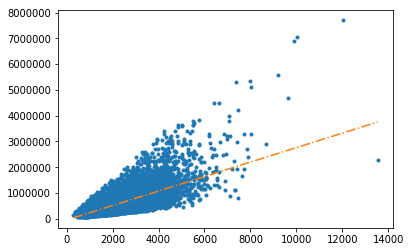

In [106]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], linear_model.predict(poly1_data[input_variable]),'-.')

In [113]:
input_var_test=
output_var_test=
str(mean_squared_error(output_var_test, linear_model.predict(X=input_var_test)))

'79626670612.1'